In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data_path = '.'
train = pd.read_csv('%s/train.csv' % data_path)
test  = pd.read_csv('%s/test.csv' % data_path)

In [4]:
print('train',train.shape)
print('test',test.shape)

train (10441, 65)
test (7000, 64)


In [5]:
train.nunique()

id                          10441
club                          647
league                         41
birth_date                   4927
height_cm                      49
weight_kg                      56
nationality                   148
potential                      40
pac                            70
sho                            74
pas                            64
dri                            65
def                            77
phy                            63
international_reputation        4
skill_moves                     5
weak_foot                       5
work_rate_att                   3
work_rate_def                   3
preferred_foot                  2
crossing                       86
finishing                      86
heading_accuracy               90
short_passing                  83
volleys                        85
dribbling                      88
curve                          86
free_kick_accuracy             85
long_passing                   81
ball_control  

In [6]:
train.groupby(['club']).size()

club
2      16
3      16
4      18
5      13
6      16
7      20
8      16
9      17
10     24
11     16
12     14
13     16
14     20
15     14
16     13
17     17
18     22
19     24
20     16
21     13
22     16
23     15
24     15
25     21
26     14
27     19
28     19
29     12
30     13
31     19
       ..
619    12
620    20
621    13
622    13
623    13
624    11
625    25
626    13
627    17
628    15
629    12
630    11
631    20
632    18
633    12
634    20
635    15
636    13
637    19
638    22
639    10
640    18
641    19
642    17
643    16
644     8
645    20
646    14
647    12
648    19
Length: 647, dtype: int64

In [8]:
import seaborn as sns
sns.set(palette='pastel')
sns.set(font_scale=2)

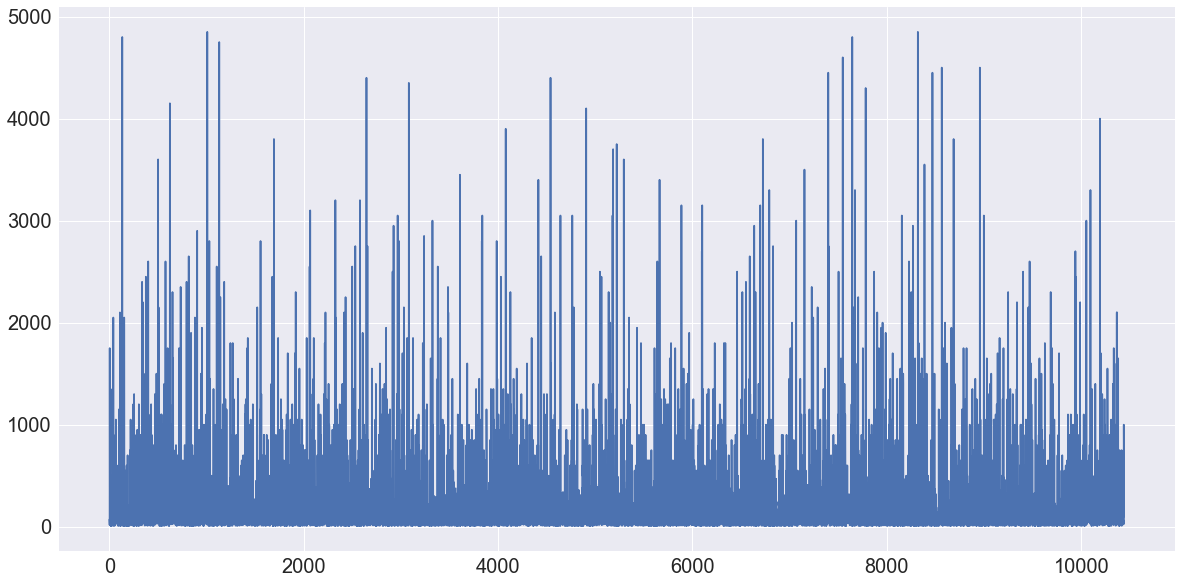

In [10]:
train.y.plot(kind='line',figsize=(20,10))

In [11]:
train.y.describe()

count    10441.000000
mean       229.288765
std        434.109564
min          6.000000
25%         35.000000
50%         72.500000
75%        220.000000
max       4850.000000
Name: y, dtype: float64

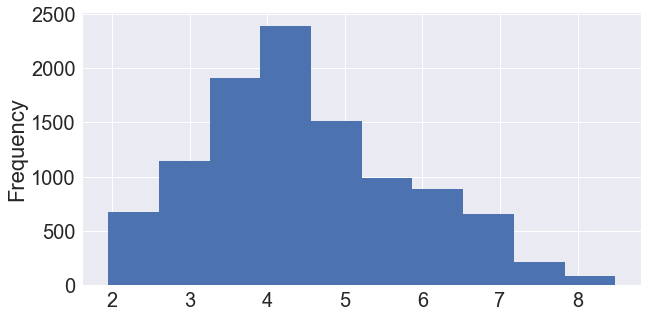

In [22]:
import numpy as np
train['logy'] = np.log(1+train.y)
train.logy.plot(kind='hist',figsize=(10,5))

In [30]:
from sklearn.ensemble import RandomForestRegressor
X = train.copy()
y = train.logy
X = X.drop(columns=['y','logy'],axis = 1)
# fill NANs 
X = X.fillna(-999)

# Label encoder
for c in train.columns[train.dtypes == 'object']:
    X[c] = X[c].factorize()[0]
    
rf = RandomForestRegressor()
rf.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

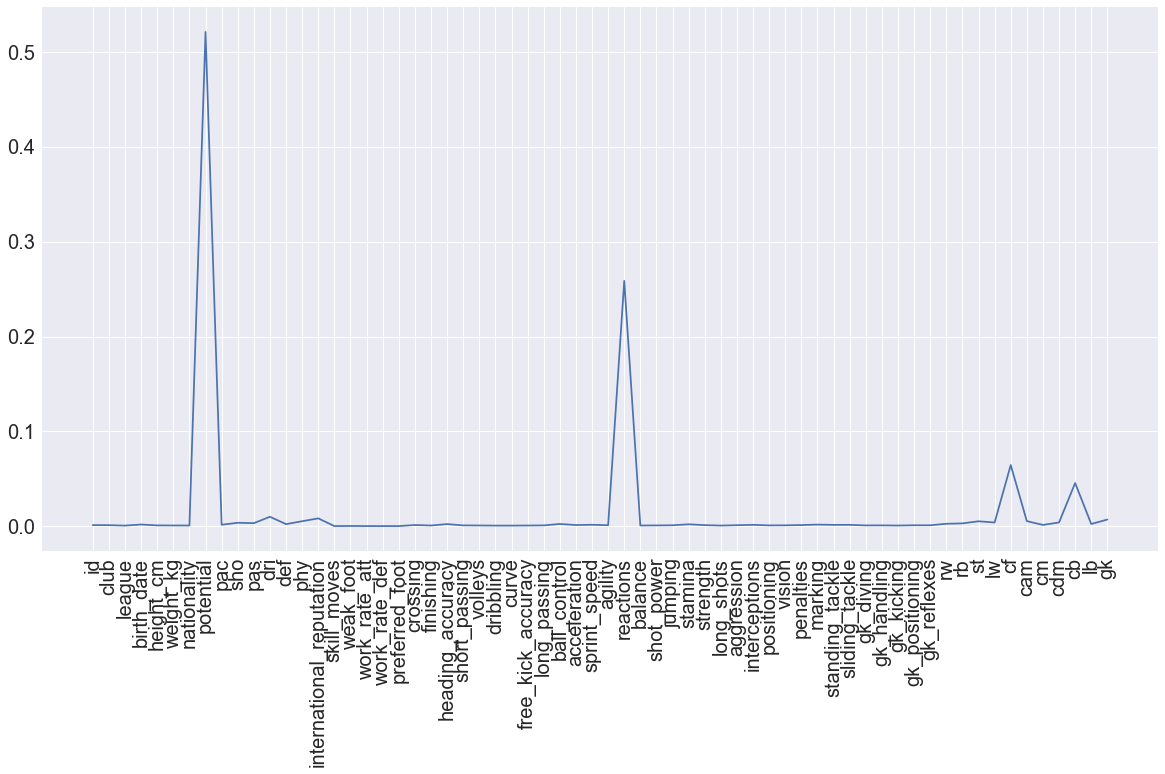

In [31]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(rf.feature_importances_)
plt.xticks(np.arange(X.shape[1]), X.columns.tolist(), rotation=90);

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10441 entries, 0 to 10440
Data columns (total 66 columns):
id                          10441 non-null int64
club                        10441 non-null int64
league                      10441 non-null int64
birth_date                  10441 non-null object
height_cm                   10441 non-null int64
weight_kg                   10441 non-null int64
nationality                 10441 non-null int64
potential                   10441 non-null int64
pac                         10441 non-null int64
sho                         10441 non-null int64
pas                         10441 non-null int64
dri                         10441 non-null int64
def                         10441 non-null int64
phy                         10441 non-null int64
international_reputation    10441 non-null int64
skill_moves                 10441 non-null int64
weak_foot                   10441 non-null int64
work_rate_att               10441 non-null object
work_ra

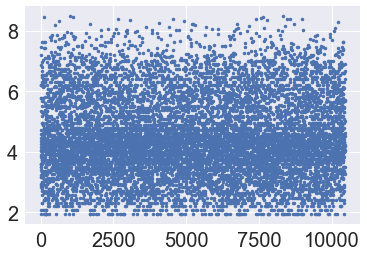

In [33]:
plt.plot(y,'.')

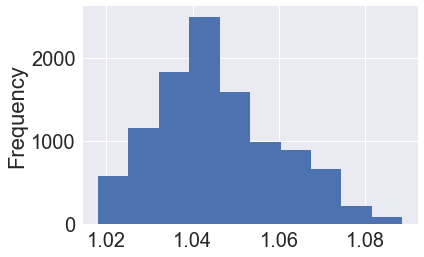

In [38]:
train['sqrt'] = np.power(train.y,0.01)
train['sqrt'].plot(kind='hist')

In [41]:
train.plot(x='p')

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000000000921AD90> (for post_execute):


ValueError: RGBA sequence should have length 3 or 4

ValueError: RGBA sequence should have length 3 or 4

In [46]:
train.isna().sum(axis=1).sort_values()

0        1
6762     1
6763     1
6764     1
6765     1
6766     1
6767     1
6768     1
6769     1
6770     1
6772     1
6773     1
6774     1
6775     1
6776     1
6777     1
6761     1
6778     1
6760     1
6757     1
6739     1
6740     1
6741     1
6743     1
6745     1
6746     1
6747     1
6748     1
6749     1
6750     1
        ..
1026    10
8107    10
6771    10
4077    10
8110    10
2076    10
5819    10
1002    10
8089    10
3239    10
2104    10
3241    10
5801    10
9341    10
9340    10
982     10
984     10
3243    10
986     10
2098    10
5809    10
3249    10
8084    10
9325    10
3251    10
2091    10
4103    10
3252    10
6805    10
9502    10
Length: 10441, dtype: int64

In [47]:
train.isna().sum(axis=0).sort_values()

id                             0
acceleration                   0
sprint_speed                   0
agility                        0
logy                           0
balance                        0
shot_power                     0
jumping                        0
stamina                        0
strength                       0
long_shots                     0
aggression                     0
ball_control                   0
interceptions                  0
vision                         0
penalties                      0
marking                        0
standing_tackle                0
sliding_tackle                 0
gk_diving                      0
gk_handling                    0
gk_kicking                     0
gk_positioning                 0
gk_reflexes                    0
y                              0
positioning                    0
long_passing                   0
reactions                      0
curve                          0
club                           0
          